In [2]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
df1 = pd.read_csv("data/DialogSum/DialogSum_longdocfactscore.csv")
df1.head()

,Unnamed: 0,id,dialog,summary,llama2chat7b_summary,gpt35_summary,gpt4oMini_summary,gptInstruct_summary,Pegasus_summary,BART_summary,...,Vic7b13_summary_ldfacts_src_hyp,llama2chat7b_summary_ldfacts_ref_hyp,gpt35_summary_ldfacts_ref_hyp,gpt4oMini_summary_ldfacts_ref_hyp,gptInstruct_summary_ldfacts_ref_hyp,BART_summary_ldfacts_ref_hyp,T5_summary_ldfacts_ref_hyp,Pegasus_summary_ldfacts_ref_hyp,Orca7b2_summary_ldfacts_ref_hyp,Vic7b13_summary_ldfacts_ref_hyp
0,0,test_0_1,"#Person1#: Ms. Dawson, I need you to take a di...",Ms. Dawson helps #Person1# to write a memo to ...,"The manager, ms. Dawson, requires an employee ...",The conversation involves Person 1 instructing...,"In a conversation between two individuals, Per...",\n\nPerson1 requests Person2 to take a dictati...,This is a verbatim transcript of a memo sent t...,Employees will only be able to use email corre...,...,-3.340605,-5.138664,-5.140091,-5.650717,-5.680528,-4.746399,-7.415958,-4.424990,-4.937879,-4.869999
1,1,test_0_2,"#Person1#: Ms. Dawson, I need you to take a di...",In order to prevent employees from wasting tim...,"The manager, ms. Dawson, requires an employee ...",The conversation between Person1 and Person2 i...,"In a conversation between two individuals, per...",\nPerson1 asks Ms. Dawson to take a dictation ...,This is a verbatim transcript of a memo sent t...,Employees will only be able to use email corre...,...,-3.340605,-4.789951,-4.822692,-4.725091,-4.661120,-4.564708,-7.339755,-3.242040,-4.708769,-4.437170
2,2,test_0_3,"#Person1#: Ms. Dawson, I need you to take a di...",Ms. Dawson takes a dictation for #Person1# abo...,"The CEO, ms. Dawson, is implementing a new pol...",The conversation between Person1 and Person2 i...,"In a conversation between two people, person1 ...",\n\nPerson1 asks Ms. Dawson to take a dictatio...,This is a verbatim transcript of a memo sent t...,Employees will only be able to use email corre...,...,-3.340605,-5.288388,-5.349434,-6.349915,-5.620252,-5.122010,-7.103699,-4.400258,-5.062889,-5.157936
3,3,test_1_1,#Person1#: You're finally here! What took so l...,#Person2# arrives late because of traffic jam....,Person1 suggests that Person2 should consider ...,Person1 and Person2 discuss Person2's consiste...,"In the conversation, Person1 expresses concern...",\n\nPerson1 and Person2 are discussing Person2...,How would you feel if you had to drive to work...,People in the city share their thoughts on dri...,...,-5.079492,-5.342445,-5.481055,-5.845049,-5.804603,-4.748013,-6.034349,-3.638197,-5.774209,-5.417303
4,4,test_1_2,#Person1#: You're finally here! What took so l...,#Person2# decides to follow #Person1#'s sugges...,Person 1 notices that Person 2 is late and sug...,Person 1 suggests to Person 2 to consider taki...,"In the conversation, person1 expresses concern...",\n\nPerson1 and person2 are discussing person2...,How would you feel if you had to drive to work...,People in the city share their thoughts on dri...,...,-5.079492,-5.569713,-6.530363,-5.950872,-5.736039,-4.459665,-6.125175,-3.477714,-5.433938,-5.411598


In [4]:
df2 = pd.read_json("data/DialogSum/DialogSum_summary_LDfacts.json")
df2.rename(columns={'summary_ldfacts_doc_hyp': 'human_summary_factuality'}, inplace=True)
merged_df = pd.merge(df1, df2, on='id', how='inner')
merged_df.head()

,Unnamed: 0,id,dialog,summary,llama2chat7b_summary,gpt35_summary,gpt4oMini_summary,gptInstruct_summary,Pegasus_summary,BART_summary,...,llama2chat7b_summary_ldfacts_ref_hyp,gpt35_summary_ldfacts_ref_hyp,gpt4oMini_summary_ldfacts_ref_hyp,gptInstruct_summary_ldfacts_ref_hyp,BART_summary_ldfacts_ref_hyp,T5_summary_ldfacts_ref_hyp,Pegasus_summary_ldfacts_ref_hyp,Orca7b2_summary_ldfacts_ref_hyp,Vic7b13_summary_ldfacts_ref_hyp,human_summary_factuality
0,0,test_0_1,"#Person1#: Ms. Dawson, I need you to take a di...",Ms. Dawson helps #Person1# to write a memo to ...,"The manager, ms. Dawson, requires an employee ...",The conversation involves Person 1 instructing...,"In a conversation between two individuals, Per...",\n\nPerson1 requests Person2 to take a dictati...,This is a verbatim transcript of a memo sent t...,Employees will only be able to use email corre...,...,-5.138664,-5.140091,-5.650717,-5.680528,-4.746399,-7.415958,-4.424990,-4.937879,-4.869999,-5.531839
1,1,test_0_2,"#Person1#: Ms. Dawson, I need you to take a di...",In order to prevent employees from wasting tim...,"The manager, ms. Dawson, requires an employee ...",The conversation between Person1 and Person2 i...,"In a conversation between two individuals, per...",\nPerson1 asks Ms. Dawson to take a dictation ...,This is a verbatim transcript of a memo sent t...,Employees will only be able to use email corre...,...,-4.789951,-4.822692,-4.725091,-4.661120,-4.564708,-7.339755,-3.242040,-4.708769,-4.437170,-5.745882
2,2,test_0_3,"#Person1#: Ms. Dawson, I need you to take a di...",Ms. Dawson takes a dictation for #Person1# abo...,"The CEO, ms. Dawson, is implementing a new pol...",The conversation between Person1 and Person2 i...,"In a conversation between two people, person1 ...",\n\nPerson1 asks Ms. Dawson to take a dictatio...,This is a verbatim transcript of a memo sent t...,Employees will only be able to use email corre...,...,-5.288388,-5.349434,-6.349915,-5.620252,-5.122010,-7.103699,-4.400258,-5.062889,-5.157936,-5.406970
3,3,test_1_1,#Person1#: You're finally here! What took so l...,#Person2# arrives late because of traffic jam....,Person1 suggests that Person2 should consider ...,Person1 and Person2 discuss Person2's consiste...,"In the conversation, Person1 expresses concern...",\n\nPerson1 and Person2 are discussing Person2...,How would you feel if you had to drive to work...,People in the city share their thoughts on dri...,...,-5.342445,-5.481055,-5.845049,-5.804603,-4.748013,-6.034349,-3.638197,-5.774209,-5.417303,-3.920115
4,4,test_1_2,#Person1#: You're finally here! What took so l...,#Person2# decides to follow #Person1#'s sugges...,Person 1 notices that Person 2 is late and sug...,Person 1 suggests to Person 2 to consider taki...,"In the conversation, person1 expresses concern...",\n\nPerson1 and person2 are discussing person2...,How would you feel if you had to drive to work...,People in the city share their thoughts on dri...,...,-5.569713,-6.530363,-5.950872,-5.736039,-4.459665,-6.125175,-3.477714,-5.433938,-5.411598,-4.136812


#### Kendall Tau Matrix

In [5]:
def get_df(df):
    cols = [col for col in df.columns if any(metric in col for metric in ["factuality", "rouge", "bleu", "meteor", "fuzzywuzzy", "cosine_similarity", "bertscore", "bartscore", "ldfacts_ref_hyp"])]
    # cols = [col for col in df.columns if any(metric in col for metric in ["ldfacts_src_hyp", "rouge", "bleu", "meteor", "fuzzywuzzy", "cosine_similarity", "bertscore", "bartscore", "ldfacts_ref_hyp"])]    
    metrics = set([re.sub(r'^.*summary_', '', col) for col in cols])
    df_new = pd.DataFrame()

    for metric in metrics:
        cols_for_metric = [col_name for col_name in df.columns if metric in col_name]
        scores = []
        for col_for_metric in cols_for_metric:
            scores += list(df[col_for_metric])
        scores = scores[:len(df)]
        df_new[metric] = scores

    if "Human_summary_factuality" in df.columns:
        df_new["factuality"] = df["Human_summary_factuality"].values

    df_new = df_new.reset_index(drop=True)
    return df_new

In [6]:
df_new = get_df(merged_df)
print(df_new.columns)

Index(['fuzzywuzzy', 'rouge_rouge_l_f_score', 'rouge_rouge_1_f_score',
       'rouge_rouge_2_f_score', 'ldfacts_ref_hyp', 'meteor',
       'bartscore_src_hyp', 'bertscore', 'factuality', 'cosine_similarity',
       'bleu'],
      dtype='object')


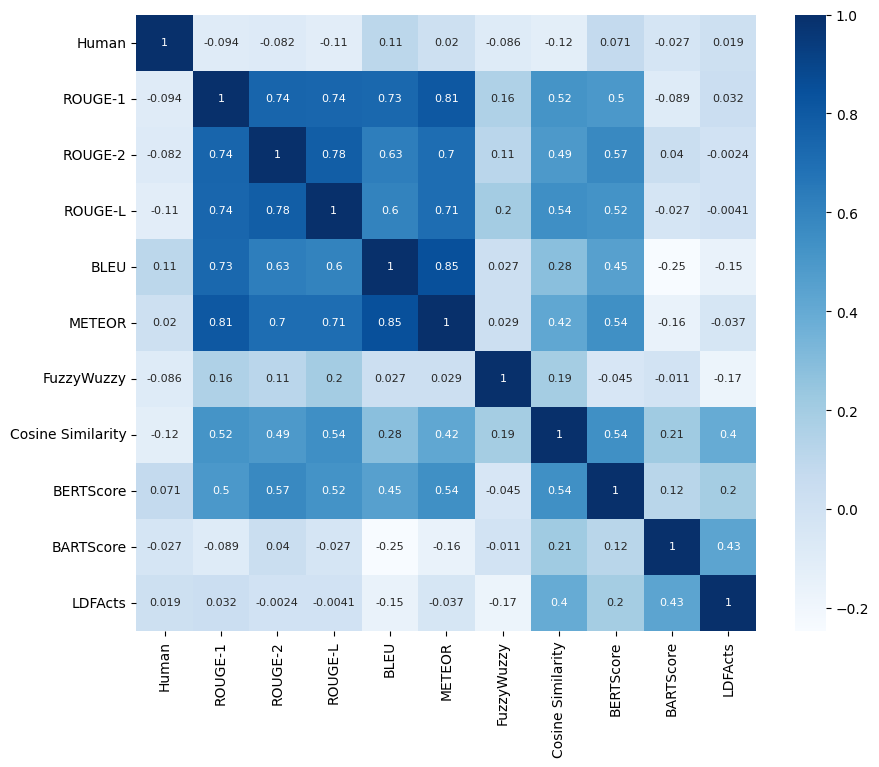

,Human,ROUGE-1,ROUGE-2,ROUGE-L,BLEU,METEOR,FuzzyWuzzy,Cosine Similarity,BERTScore,BARTScore,LDFActs
Human,1.000000,-0.093878,-0.082449,-0.110204,0.108571,0.020408,-0.086208,-0.118367,0.071020,-0.026939,0.018776
ROUGE-1,-0.093878,1.000000,0.743673,0.738776,0.732245,0.807347,0.156817,0.518367,0.495510,-0.088980,0.031837
ROUGE-2,-0.082449,0.743673,1.000000,0.776327,0.629388,0.704490,0.114123,0.493878,0.572245,0.040000,-0.002449
ROUGE-L,-0.110204,0.738776,0.776327,1.000000,0.601633,0.706122,0.199511,0.544490,0.524898,-0.026939,-0.004082
BLEU,0.108571,0.732245,0.629388,0.601633,1.000000,0.846531,0.027094,0.280000,0.453061,-0.245714,-0.154286
METEOR,0.020408,0.807347,0.704490,0.706122,0.846531,1.000000,0.028736,0.420408,0.541224,-0.157551,-0.036735
FuzzyWuzzy,-0.086208,0.156817,0.114123,0.199511,0.027094,0.028736,1.000000,0.194584,-0.045157,-0.010673,-0.173238
Cosine Similarity,-0.118367,0.518367,0.493878,0.544490,0.280000,0.420408,0.194584,1.000000,0.539592,0.213061,0.395918
BERTScore,0.071020,0.495510,0.572245,0.524898,0.453061,0.541224,-0.045157,0.539592,1.000000,0.115102,0.196735
BARTScore,-0.026939,-0.088980,0.040000,-0.026939,-0.245714,-0.157551,-0.010673,0.213061,0.115102,1.000000,0.431837


In [9]:
def calculate_means_and_correlation(df):
    cols = [col for col in df.columns if any(metric in col for metric in ["factuality", "rouge", "bleu", "meteor", "fuzzywuzzy", "cosine_similarity", "bertscore", "bartscore", "ldfacts_src_hyp"])]    
    # cols = [col for col in df.columns if any(metric in col for metric in [
    #     "ldfacts_src_hyp", "rouge", "bleu", "meteor", "fuzzywuzzy", 
    #     "cosine_similarity", "bertscore", "bartscore", "ldfacts_ref_hyp"
    # ])]

    df_means = pd.DataFrame()

    if "human_summary_factuality" in df.columns:
        df_means["factuality"] = df["human_summary_factuality"].values

    for col in cols:
        metric_name = re.sub(r'^.*summary_', '', col)
        if metric_name not in df_means:
            df_means[metric_name] = df[[col]].mean(axis=1)
        else:
            df_means[metric_name] += df[[col]].mean(axis=1)

    df_means = df_means.div(len(cols))

    rename_dict = {
        "factuality": "Human",
        "rouge_rouge_1_f_score": "ROUGE-1",
        "bertscore": "BERTScore",
        "rouge_rouge_2_f_score": "ROUGE-2",
        "bartscore_src_hyp": "BARTScore",
        "rouge_rouge_l_f_score": "ROUGE-L",
        "bleu": "BLEU",
        "meteor": "METEOR",
        "fuzzywuzzy": "FuzzyWuzzy",
        "cosine_similarity": "Cosine Similarity",
        "ldfacts_src_hyp": "LDFActs",
    }

    df_means = df_means.rename(columns=rename_dict)
    column_order = ["Human"] + [col for col in df_means.columns if col != "Human"]
    df_means = df_means[column_order]
    
    correlation_matrix = df_means.corr(method='kendall')

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, cmap="Blues",
        annot=True,
        xticklabels=df_means.columns,
        yticklabels=df_means.columns,
        annot_kws={"fontsize": 8},
    )
    plt.savefig("results/DialogSum/DialogSum_metrics.png", bbox_inches="tight")
    plt.show()
    return correlation_matrix

calculate_means_and_correlation(merged_df)

### LongDocFACTScore

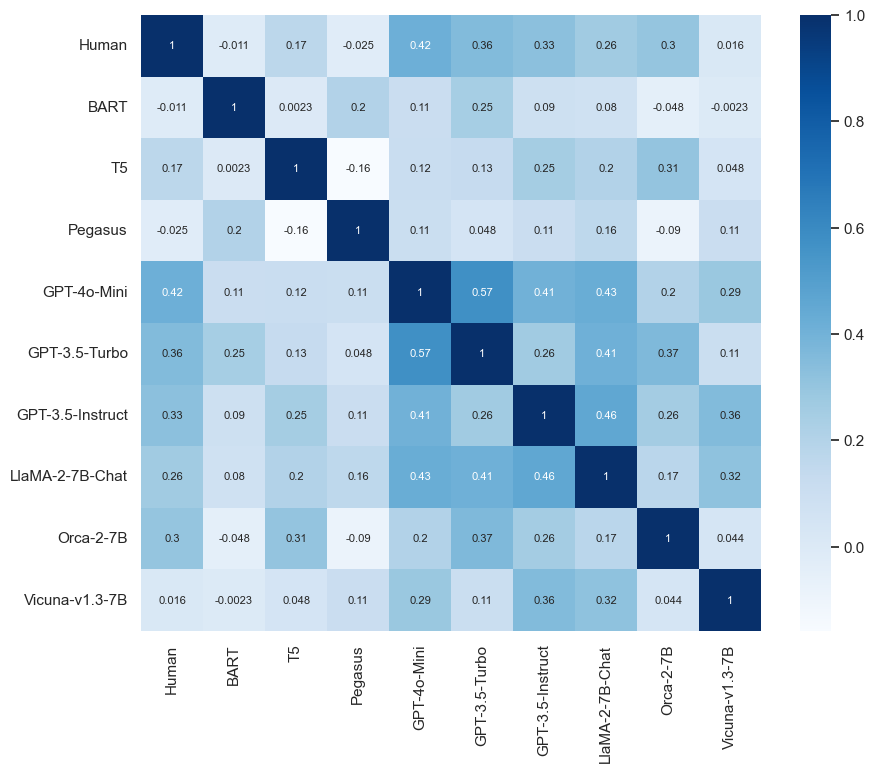

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_correlation_matrix(df):
    cols = [
        "human_summary_factuality",
        "BART_summary_ldfacts_src_hyp",
        "T5_summary_ldfacts_src_hyp",
        "Pegasus_summary_ldfacts_src_hyp",
        "gpt4oMini_summary_ldfacts_src_hyp",
        "gpt35_summary_ldfacts_src_hyp",
        "gptInstruct_summary_ldfacts_src_hyp",
        "llama2chat7b_summary_ldfacts_src_hyp",
        "Orca7b2_summary_ldfacts_src_hyp",
        "Vic7b13_summary_ldfacts_src_hyp"
    ]

    rename_dict = {
        "human_summary_factuality": "Human",
        "BART_summary_ldfacts_src_hyp": "BART",
        "T5_summary_ldfacts_src_hyp": "T5",
        "Pegasus_summary_ldfacts_src_hyp": "Pegasus",
        "gpt4oMini_summary_ldfacts_src_hyp": "GPT-4o-Mini",
        "gpt35_summary_ldfacts_src_hyp": "GPT-3.5-Turbo",
        "gptInstruct_summary_ldfacts_src_hyp": "GPT-3.5-Instruct",
        "llama2chat7b_summary_ldfacts_src_hyp": "LlaMA-2-7B-Chat",
        "Orca7b2_summary_ldfacts_src_hyp": "Orca-2-7B",
        "Vic7b13_summary_ldfacts_src_hyp": "Vicuna-v1.3-7B"
    }
    
    df = df[cols].rename(columns=rename_dict)
    cm = df.corr(method='kendall')
    
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1)
    sns.heatmap(
        cm,
        cmap="Blues",
        annot=True,
        xticklabels=df.columns,
        yticklabels=df.columns,
        annot_kws={"fontsize": 8},
    )
    
    # plt.xticks(rotation=90, ha='right')
    # plt.yticks(rotation=0)
    plt.savefig("results/LongSciVerify/LongSciVerify_LLM_LDFacts.png", bbox_inches="tight") ### change here  
    plt.show()

visualize_correlation_matrix(merged_df)